# Loading `cleaned` into memory using R's magic

In [1]:
cleaned <- read.csv("cleaned", header=0, row.names=1,sep="\t", skip=0)

## Renaming column and row descriptions appropriately

In [2]:
cleaned[,ncol(cleaned)] <- NULL

renameNumCols <- function(table, rowName) {
    result <- c()

    for (val in table[rowName,]) {
        result <- c(result, paste("X", val, sep=""))
    }
    
    colnames(table) <- result
    return(table)
}

renameNumRowsSelf <- function(table) {
    result <- c()
    for (rowName in rownames(table)) {
        result <- c(result, paste("X", rowName, sep="")) 
    }
    rownames(table) <- result
    return(table)
}

cleaned <- renameNumCols(cleaned, "IDs")

counter <- 0
for (val in rownames(cleaned)) {
    counter <- counter + 1
    if (val == "Affymetrix") {
        break
    }
}

metadata <- cleaned[c(1:counter-1),]
data <- cleaned[c((counter+1):nrow(cleaned)),]

data <- renameNumRowsSelf(data)

metadata <- t(metadata)
data <- data

In [3]:
design <- data.frame("ModalAllele" = as.numeric(metadata[,"ModalAllele"]))
rownames(design) <- rownames(metadata)


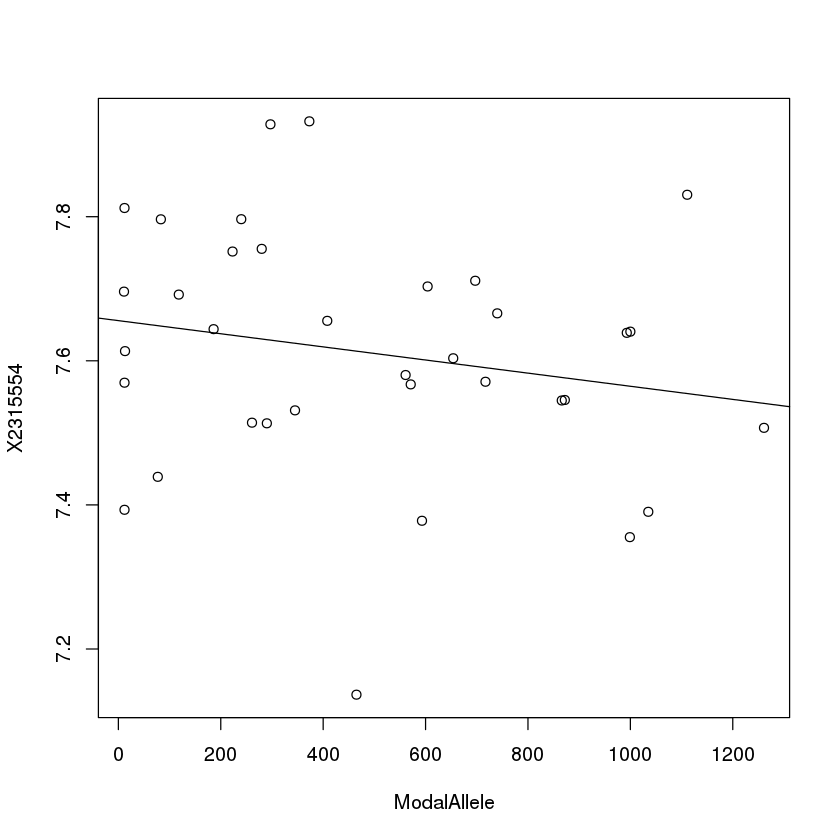

In [4]:
exampleData <- cleaned[c("ModalAllele", "2315554"), ]

rownames(exampleData) <- c("ModalAllele", "X2315554")
exampleData <- t(exampleData)
actualFrame <- data.frame("ModalAllele" = as.numeric(exampleData[,"ModalAllele"]), "X2315554" = as.numeric(exampleData[,"X2315554"]))
fit <- lm(X2315554 ~ ModalAllele, data=actualFrame)
plot(actualFrame)
abline(fit)

### Example of fitting a single linear regression using built-in lm. I'm surprised at the amount of hackery involved to get this working -- clearly I'm doing something wrong.

## The real thing -- fitting model with limma (can't get it to work)

In [5]:
library(limma)
require(Biobase)

eset <- new("ExpressionSet", exprs=data)

# no idea how to fix this...
lmFit(as.matrix(eset), design)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit

Welcome to Bioconductor

    Vignettes contain introductory ma

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘annotatedDataFrameFrom’ for signature ‘"factor"’
